Kokeillaan lineaarista regressiota dataan, jossa tarkastellaan valkoviinin laatuun vaikuttavia tekijöitä.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df=pd.read_csv('http://taanila.fi/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


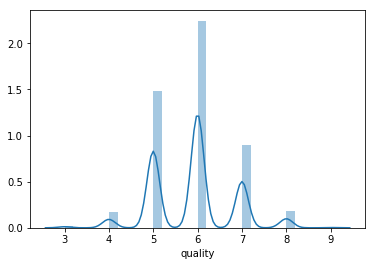

In [8]:
#Tarkistetaan selitettävän muuttujan (quality) jakauma
sns.distplot(df['quality'], bins=30)

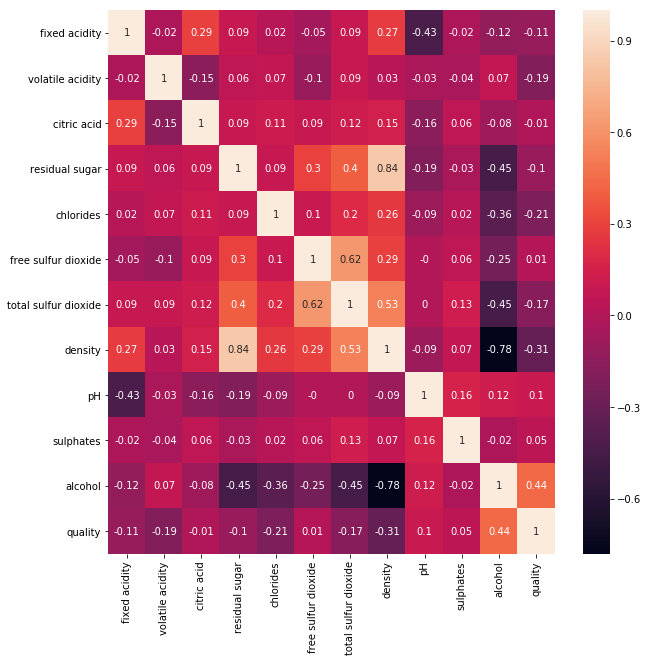

In [10]:
#Lasketaan korrelaatiokertoimet
korrelaatiot = df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(data=korrelaatiot, annot=True)

Korrelaatiokertoimista nähään, että millään yksittäise
llä muuttujalla ei ole voimakasta korrelaatiota laatuun,
korkein on alkoholin-määrä.


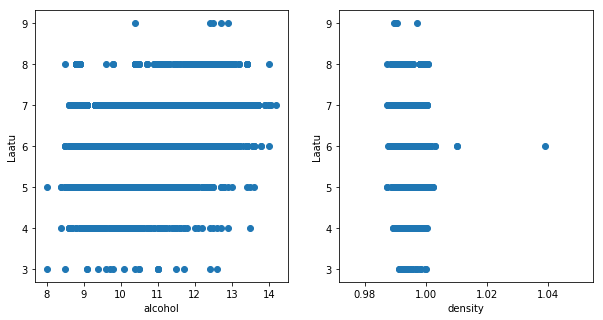

In [13]:
#Valitaan kaksi korkeimman korrelaation omaavaa muuttujaa
features = ['alcohol', 'density']
target = df['quality']
plt.figure(figsize=(10,5))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(df[feature],target)
    plt.xlabel(feature)
    plt.ylabel('Laatu')

In [14]:
X = df[['alcohol', 'density']]
y= df['quality']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 2)
(980, 2)
(3918,)
(980,)


In [17]:
from sklearn.linear_model import LinearRegression

malli = LinearRegression()
malli.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
malli.intercept_

-19.726857785103736

In [20]:
malli.coef_

array([ 0.36036029, 21.95467906])

In [25]:
from sklearn.metrics import mean_squared_error

y_train_predict = malli.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = malli.score(X_train, y_train)

print('Mallin sopivuus opetusdataan:')
print(rmse)
print(r2)
print("\n")

y_test_predict=malli.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2=malli.score(X_test, y_test)

print('Mallin sopivuus testidataan')
print(rmse)
print(r2)

Mallin sopivuus opetusdataan:
0.8039888588681018
0.19189985913465146


Mallin sopivuus testidataan
0.7625235834558773
0.1925943278026382


C:\Users\joniv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


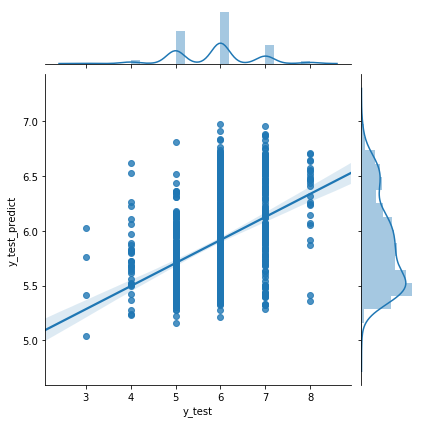

In [27]:
test = pd.DataFrame()
test['y_test'] = y_test
test['y_test_predict'] = y_test_predict

sns.jointplot(data=test, x='y_test', y='y_test_predict', kind ='reg')

Lisätään malliin enemmän selittäviä muuttujia, jotta saataisiin siitä parempi

In [29]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'density']]
y= df['quality']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


In [31]:
from sklearn.linear_model import LinearRegression

malli = LinearRegression()
malli.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
malli.intercept_

145.49899899152726

In [33]:
malli.coef_

array([ 5.96903358e-02, -1.82012138e+00,  6.17205001e-02,  7.89407266e-02,
       -6.61655520e-01,  3.81374126e-03, -1.39989792e-04,  6.37144441e-01,
        5.95784364e-01,  2.04505659e-01, -1.45469328e+02])

In [34]:
from sklearn.metrics import mean_squared_error

y_train_predict = malli.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = malli.score(X_train, y_train)

print('Mallin sopivuus opetusdataan:')
print(rmse)
print(r2)
print("\n")

y_test_predict=malli.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2=malli.score(X_test, y_test)

print('Mallin sopivuus testidataan')
print(rmse)
print(r2)

Mallin sopivuus opetusdataan:
0.7598209749267659
0.27824852939268185


Mallin sopivuus testidataan
0.7126276970933293
0.29480271569776717


C:\Users\joniv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


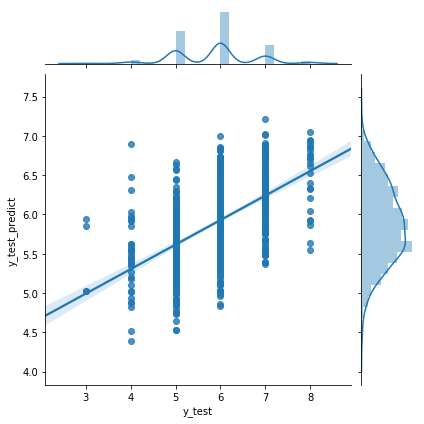

In [35]:
test = pd.DataFrame()
test['y_test'] = y_test
test['y_test_predict'] = y_test_predict

sns.jointplot(data=test, x='y_test', y='y_test_predict', kind ='reg')

Ottamalla malliin kaikki datasta löytyvät selittävät muuttujat saatiin siitä hieman parempi (selityskertoimet: 0,28 ja 0,3 vs. 0,19 ja 0,19). Mutta hyvää mallista ei tälläkään tavalla saatu, mikä oli ehkä jo arvioitavissa korrelaatiokertoimien perusteella, jotka kaikki olivat pieniä.